In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=18)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('lines', markersize=10)

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model

In [23]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [24]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [25]:
def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

In [26]:
x_train = normalize(x_train)
x_test = normalize(x_test)

In [27]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [28]:
print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 10)


In [29]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        25632     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 4, 4, 64)         

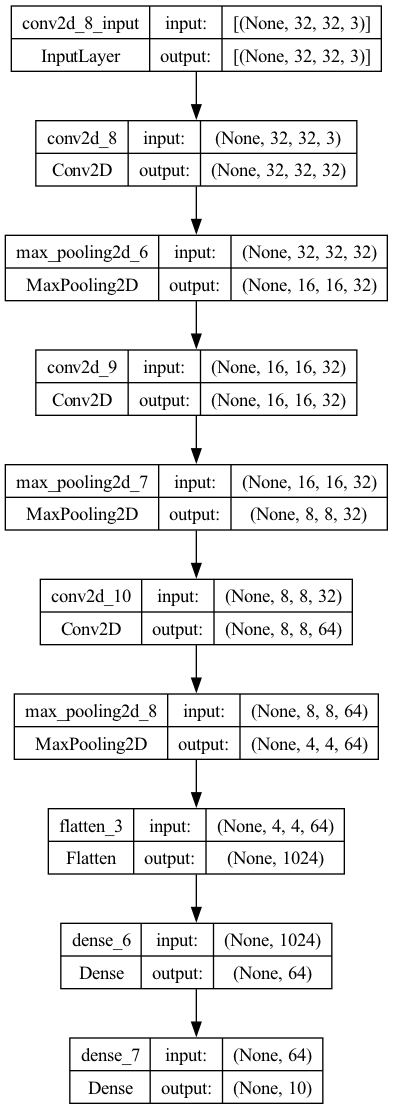

In [30]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [31]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2023-09-27 16:40:28.625286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 1.6794 - accuracy: 0.3801

2023-09-27 16:40:37.236808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 10s 27ms/step - loss: 1.6794 - accuracy: 0.3801 - val_loss: 1.4279 - val_accuracy: 0.4807
Epoch 2/10
313/313 [==============================] - 8s 25ms/step - loss: 1.3371 - accuracy: 0.5195 - val_loss: 1.2838 - val_accuracy: 0.5404
Epoch 3/10
313/313 [==============================] - 7s 24ms/step - loss: 1.1774 - accuracy: 0.5832 - val_loss: 1.1430 - val_accuracy: 0.5931
Epoch 4/10
313/313 [==============================] - 8s 25ms/step - loss: 1.0709 - accuracy: 0.6212 - val_loss: 1.1381 - val_accuracy: 0.5896
Epoch 5/10
313/313 [==============================] - 7s 24ms/step - loss: 0.9945 - accuracy: 0.6503 - val_loss: 1.0737 - val_accuracy: 0.6235
Epoch 6/10
313/313 [==============================] - 7s 24ms/step - loss: 0.9394 - accuracy: 0.6735 - val_loss: 0.9945 - val_accuracy: 0.6576
Epoch 7/10
313/313 [==============================] - 8s 26ms/step - loss: 0.8913 - accuracy: 0.6900 - val_loss: 1.0989 - val_accuracy: 0.6266
Epoch 8/1

2023-09-27 16:41:46.748863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 14ms/step


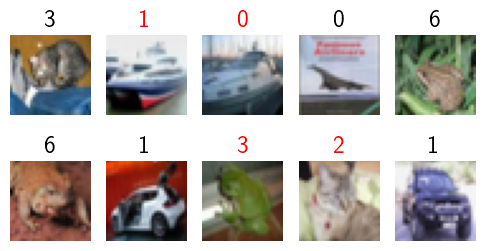

In [32]:
fig, axes = plt.subplots(2, 5, figsize=(6, 3))
for i in range(10):
    axes[i//5, i%5].imshow(x_test[i])
    axes[i//5, i%5].set_title(np.argmax(model.predict(x_test[i:i+1])), color='r' if np.argmax(model.predict(x_test[i:i+1])) != np.argmax(y_test[i]) else 'k')
    axes[i//5, i%5].axis('off')
plt.show()

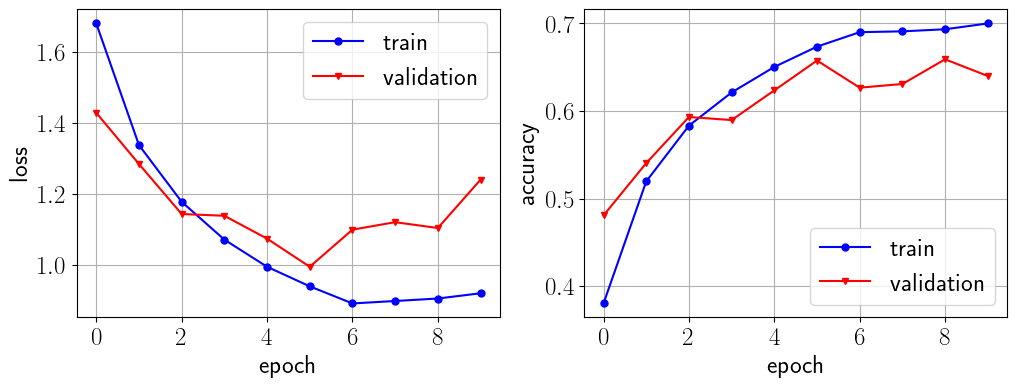

In [39]:
# Plot loss and accuracy
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
color_train = 'b'
color_val = 'r'
marker_train = 'o'
marker_val = 'v'
marker_size = 5
axes[0].plot(history.history['loss'], color=color_train, marker=marker_train, label='train', markersize=marker_size)
axes[0].plot(history.history['val_loss'], color=color_val, marker=marker_val, label='validation', markersize=marker_size)
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
axes[0].legend()
axes[0].grid()
axes[1].plot(history.history['accuracy'], color=color_train, marker=marker_train, label='train', markersize=marker_size)
axes[1].plot(history.history['val_accuracy'], color=color_val, marker=marker_val, label='validation', markersize=marker_size)
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
axes[1].legend()
axes[1].grid()
plt.show()

In [33]:
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

79/79 [==============================] - 1s 12ms/step - loss: 1.2859 - accuracy: 0.6287
test loss, test acc: [1.2859314680099487, 0.6287000179290771]
